In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dati ISTAT
data = pd.read_csv("DCSP_COLTIVAZIONI_22032024191007716.csv")

In [4]:
# Rimozione spazi bianchi dopo le stringhe della colonna 'Tipo dato'
data['Tipo dato'] = data['Tipo dato'].str.rstrip()

In [5]:
# Elenco feature 'Tipo dato'
data["Tipo dato"].unique()

array(['produzione totale - quintali', 'produzione raccolta - quintali',
       'superficie totale - are', 'superficie totale - ettari',
       'superficie in produzione - ettari', 'unità foraggere',
       'produzione totale - ettolitri',
       'produzione totale - migliaia di quintali'], dtype=object)

In [6]:
# Elenco feature 'Territorio'
data["Territorio"].unique()

array(['Italia', 'Nord', 'Piemonte', 'Cuneo', 'Asti', 'Liguria',
       'Imperia', 'Genova', 'La Spezia', 'Lombardia', 'Varese', 'Lecco',
       'Milano', 'Bergamo', 'Brescia', 'Cremona', 'Mantova',
       'Trentino Alto Adige / Südtirol', 'Veneto', 'Vicenza', 'Treviso',
       'Venezia', 'Padova', 'Rovigo', 'Friuli-Venezia Giulia', 'Trieste',
       'Emilia-Romagna', 'Piacenza', 'Parma', 'Bologna', 'Ferrara',
       'Forlì-Cesena', 'Centro', 'Toscana', 'Massa-Carrara', 'Firenze',
       'Prato', 'Livorno', 'Arezzo', 'Grosseto', 'Umbria', 'Perugia',
       'Marche', 'Pesaro e Urbino', 'Ancona', 'Macerata', 'Ascoli Piceno',
       'Lazio', 'Roma', 'Latina', 'Frosinone', 'Mezzogiorno', 'Campania',
       'Caserta', 'Napoli', 'Salerno', 'Puglia', 'Brindisi', 'Calabria',
       'Catanzaro', 'Reggio di Calabria', 'Sicilia', 'Agrigento',
       'Catania', 'Sardegna', 'Sassari', 'Nuoro', 'Cagliari', 'Oristano',
       'Olbia-Tempio', 'Ogliastra', 'Medio Campidano',
       'Carbonia-Iglesias',

In [7]:
# Filtro 'Tipo dato' di interesse
data_filtered = data[data["Tipo dato"].isin(['superficie totale - ettari', 'superficie totale - are', 
                                           'superficie in produzione - ettari', 'produzione totale - quintali', 
                                           'produzione totale - migliaia di quintali', 'produzione raccolta - quintali'])]

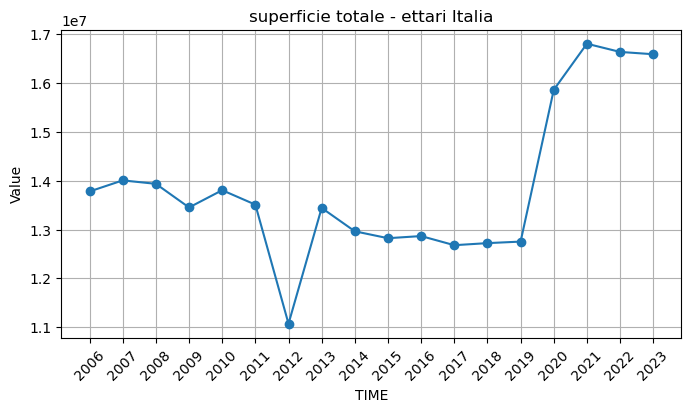

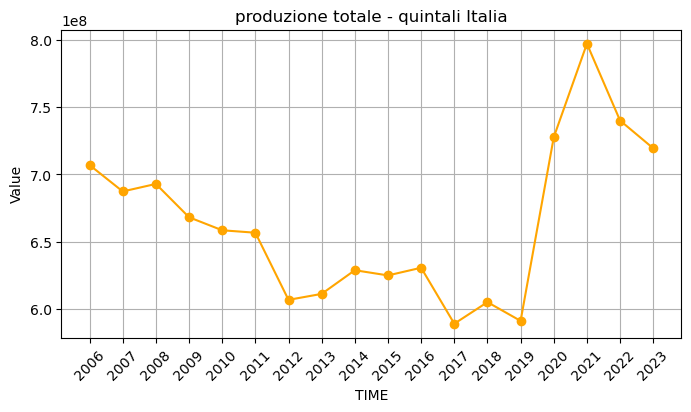

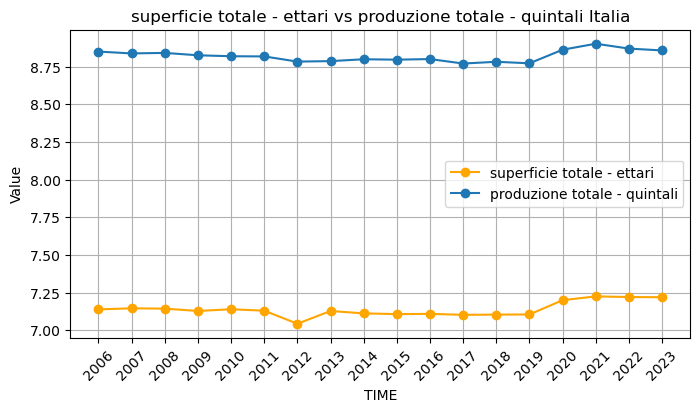

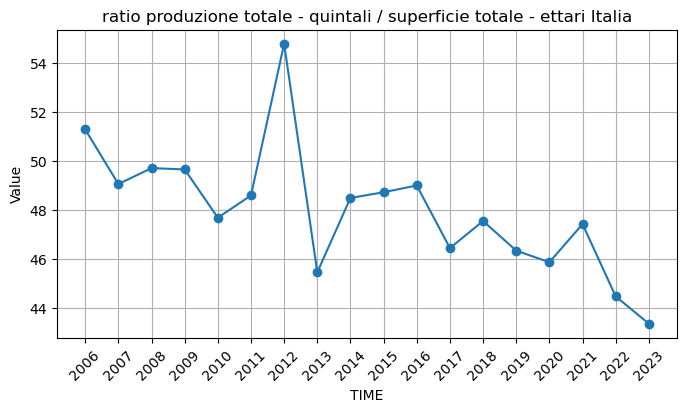

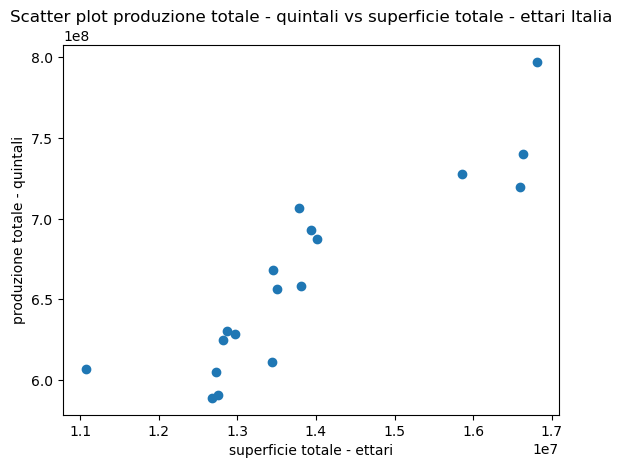

,produzione raccolta - quintali,produzione totale - migliaia di quintali,produzione totale - quintali,superficie in produzione - ettari,superficie totale - are,superficie totale - ettari
produzione raccolta - quintali,1.000000,0.512356,0.858649,0.931128,0.636157,0.927588
produzione totale - migliaia di quintali,0.512356,1.000000,0.610461,0.734236,-0.079819,0.758305
produzione totale - quintali,0.858649,0.610461,1.000000,0.821068,0.336997,0.890680
superficie in produzione - ettari,0.931128,0.734236,0.821068,1.000000,0.643131,0.978447
superficie totale - are,0.636157,-0.079819,0.336997,0.643131,1.000000,0.573462
superficie totale - ettari,0.927588,0.758305,0.890680,0.978447,0.573462,1.000000


In [9]:
# Selezione del territorio di interesse
territorio = 'Italia'

# Selezione degli attributi che si vogliono osservare
attributo_1 = 'superficie totale - ettari'
attributo_2 = 'produzione totale - quintali'
#attributo_1 = 'produzione totale - quintali'
#attributo_2 = 'produzione raccolta - quintali'
#attributo_1 = 'superficie totale - ettari'
#attributo_2 = 'superficie in produzione - ettari'

data_filtered2 = data_filtered[data_filtered['Territorio'] == territorio]
column_of_interest = ['Tipo dato', 'Tipo di coltivazione', 'TIME', 'Value']
data_filtered3 = data_filtered2[column_of_interest]

# Calcolo valore totale per Tipo dato e TIME
summarized_df = data_filtered3.groupby(['Tipo dato', 'TIME'])['Value'].sum().reset_index()

# Rimozione anno 2024 perchè mancano dei dati
summarized_df = summarized_df[summarized_df['TIME'] != 2024]

# Selezione primo attributo
attributo_1_df = summarized_df[summarized_df['Tipo dato'] == attributo_1]

# Plot primo attributo
plt.figure(figsize=(8,4))
plt.plot(attributo_1_df['TIME'], attributo_1_df['Value'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
plt.xticks(rotation=45)
plt.title(attributo_1 + ' ' + territorio)
plt.grid()
plt.show()

# Selezione secondo attributo
attributo_2_df = summarized_df[summarized_df['Tipo dato'] == attributo_2]

# Plot secondo attributo
plt.figure(figsize=(8,4))
plt.plot(attributo_2_df['TIME'], attributo_2_df['Value'], marker='o', color='orange')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
plt.xticks(rotation=45)
plt.title(attributo_2 + ' ' + territorio)
plt.grid()
plt.show()

# Plot primo attributo vs secondo attributo
plt.figure(figsize=(8,4))
plt.plot(attributo_1_df['TIME'], np.log10(attributo_1_df['Value']), label = attributo_1, marker='o', color = 'orange')
plt.plot(attributo_2_df['TIME'], np.log10(attributo_2_df['Value']), label = attributo_2, marker='o')
#plt.plot(sup_totale_ettari['TIME'], sup_totale_ettari['Value'], marker='o')
#plt.plot(prod_tot_quintali['TIME'], prod_tot_quintali['Value'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
#plt.yticks(range(7,8))
plt.xticks(rotation=45)
plt.legend()
plt.title(attributo_1 + ' vs ' + attributo_2 + ' ' + territorio)
plt.grid()
plt.show()

# Pivot table per calcolare ratio secondo attributo / primo attributo 
pivot_df = summarized_df.pivot_table(index='TIME', columns='Tipo dato', values='Value')

pivot_df = pd.DataFrame(pivot_df.to_records())

pivot_df['ratio'] = pivot_df[attributo_2]/pivot_df[attributo_1]

# Plot ratio secondo attributo / primo attributo
plt.figure(figsize=(8,4))
plt.plot(pivot_df['TIME'], pivot_df['ratio'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
#plt.yticks(range(7,8))
plt.xticks(rotation=45)
plt.title('ratio ' + attributo_2 + ' / ' + attributo_1 + ' ' + territorio)
plt.grid()
plt.show()

# Scatter plot
df_for_corr = pivot_df.drop(columns = ['TIME', 'ratio'])
plt.scatter(df_for_corr[attributo_1], df_for_corr[attributo_2])
plt.xlabel(attributo_1)
plt.ylabel(attributo_2)
plt.title('Scatter plot ' + attributo_2 + ' vs ' + attributo_1 + ' ' + territorio)
plt.show()

# Matrice di correlazione
corr_matrix = df_for_corr.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [11]:
import altair as alt

In [12]:
alt.Chart(attributo_1_df.head(2)).mark_point().to_dict()

{'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}},
 'data': {'name': 'data-1fd312e003e74151b5e5afee39440aab'},
 'mark': {'type': 'point'},
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.17.0.json',
 'datasets': {'data-1fd312e003e74151b5e5afee39440aab': [{'Tipo dato': 'superficie totale - ettari',
    'TIME': 2006,
    'Value': 13781322.0},
   {'Tipo dato': 'superficie totale - ettari',
    'TIME': 2007,
    'Value': 14008038.0}]}}

In [13]:
alt.Chart(attributo_1_df).mark_circle(tooltip=True).encode(
    y='Value:Q',
    x='TIME:N',
    color=alt.Color(field='Value', type='quantitative',  bin=alt.BinParams(maxbins=5)),
    size=alt.Size(field='Value', type='quantitative',  bin=alt.BinParams(maxbins=5))
).properties(title=attributo_1 + ' ' + territorio, width = 800)#.transform_filter('datum.TIME > 2013')

alt.Chart(...)

In [14]:
base = alt.Chart(attributo_1_df).encode(
    y='Value:Q',
    x='TIME:N',
    tooltip = ['TIME:N', 'Value:Q']
    #color = 'Value:Q',
    #size = 'Value:Q'
    #color=alt.Color(field='Value', type='quantitative',  bin=alt.BinParams(maxbins=5)),
    #size=alt.Size(field='Value', type='quantitative',  bin=alt.BinParams(maxbins=5))
).properties(title=attributo_1, width = 800)
base.mark_line() + base.mark_point()

alt.LayerChart(...)

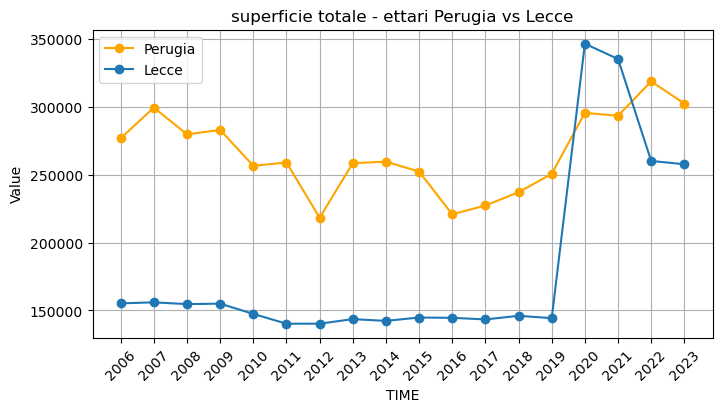

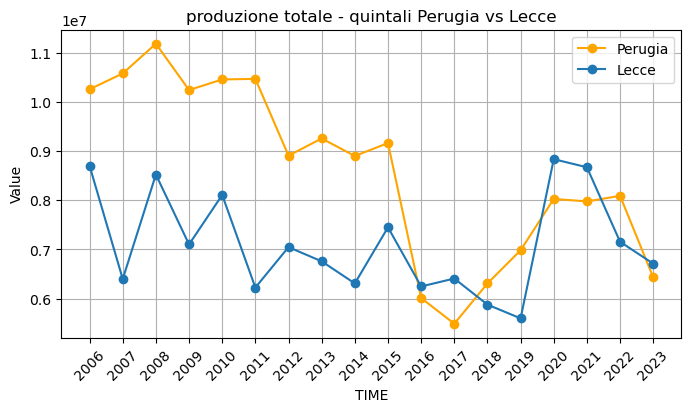

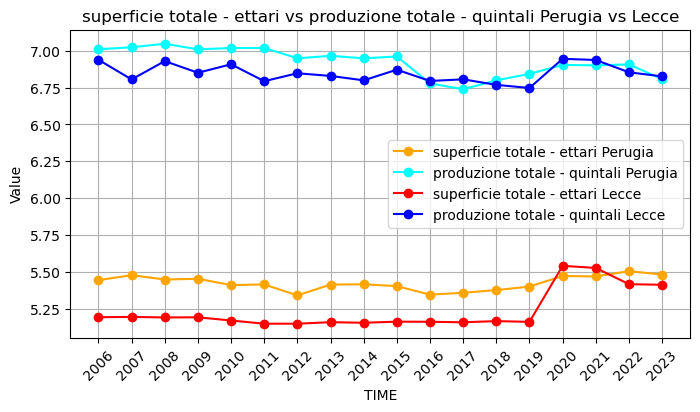

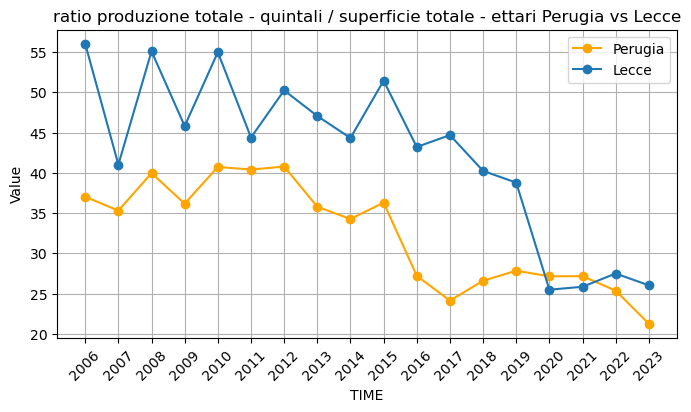

In [15]:
# Selezione territori che si vogliono confrontare 
territori_a_confronto = ['Perugia', 'Lecce']

# Selezione degli attributi che si vogliono osservare
attributo_1 = 'superficie totale - ettari'
attributo_2 = 'produzione totale - quintali'
#attributo_1 = 'produzione totale - quintali'
#attributo_2 = 'produzione raccolta - quintali'

data_filtered2 = data_filtered[data_filtered['Territorio'].isin(territori_a_confronto)]

# Rimozione dati stimati
#data_filtered2 = data_filtered2[data_filtered2['Flags'] != 'dato stimato']

column_of_interest = ['Tipo dato', 'Territorio', 'Tipo di coltivazione', 'TIME', 'Value']
data_filtered3 = data_filtered2[column_of_interest]

# Calcolo valore totale per Tipo dato, TIME e Territorio
summarized_df = data_filtered3.groupby(['Tipo dato', 'TIME', 'Territorio'])['Value'].sum().reset_index()

# Rimozione anno 2024 perchè mancano dei dati
summarized_df = summarized_df[summarized_df['TIME'] != 2024]

# Selezione primo attributo
attributo_1_df = summarized_df[summarized_df['Tipo dato'] == attributo_1]

# Selezione territori di interesse
attributo_1_df_zona_1 = attributo_1_df[attributo_1_df['Territorio'] == territori_a_confronto[0]]
attributo_1_df_zona_2 = attributo_1_df[attributo_1_df['Territorio'] == territori_a_confronto[1]]

# Plot primo attributo dei territori a confronto
plt.figure(figsize=(8,4))
plt.plot(attributo_1_df_zona_1['TIME'], attributo_1_df_zona_1['Value'], label = territori_a_confronto[0], marker='o', color = 'orange')
plt.plot(attributo_1_df_zona_2['TIME'], attributo_1_df_zona_2['Value'], label = territori_a_confronto[1], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
plt.xticks(rotation=45)
plt.title(attributo_1 + ' ' + territori_a_confronto[0] + ' vs ' +  territori_a_confronto[1])
plt.legend()
plt.grid()
plt.show()

# Selezione secondo attributo
attributo_2_df = summarized_df[summarized_df['Tipo dato'] == attributo_2]

# Selezione territori di interesse
attributo_2_df_zona_1 = attributo_2_df[attributo_2_df['Territorio'] == territori_a_confronto[0]]
attributo_2_df_zona_2 = attributo_2_df[attributo_2_df['Territorio'] == territori_a_confronto[1]]

# Plot secondo attributo dei territori a confronto
plt.figure(figsize=(8,4))
plt.plot(attributo_2_df_zona_1['TIME'], attributo_2_df_zona_1['Value'], label = territori_a_confronto[0], marker='o', color = 'orange')
plt.plot(attributo_2_df_zona_2['TIME'], attributo_2_df_zona_2['Value'], label = territori_a_confronto[1], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
plt.xticks(rotation=45)
plt.title(attributo_2 + ' ' + territori_a_confronto[0] + ' vs ' +  territori_a_confronto[1])
plt.legend()
plt.grid()
plt.show()

# Plot primo attributo vs secondo attributo dei territori a confronto
plt.figure(figsize=(8,4))
plt.plot(attributo_1_df_zona_1['TIME'], np.log10(attributo_1_df_zona_1['Value']), label = attributo_1 + ' ' + territori_a_confronto[0], marker='o', color = 'orange')
plt.plot(attributo_2_df_zona_1['TIME'], np.log10(attributo_2_df_zona_1['Value']), label = attributo_2 + ' ' + territori_a_confronto[0], marker='o', color = 'cyan')
plt.plot(attributo_1_df_zona_2['TIME'], np.log10(attributo_1_df_zona_2['Value']), label = attributo_1 + ' ' + territori_a_confronto[1], marker='o', color = 'red')
plt.plot(attributo_2_df_zona_2['TIME'], np.log10(attributo_2_df_zona_2['Value']), label = attributo_2 + ' ' + territori_a_confronto[1], marker='o', color = 'blue')
#plt.plot(sup_totale_ettari['TIME'], sup_totale_ettari['Value'], marker='o')
#plt.plot(prod_tot_quintali['TIME'], prod_tot_quintali['Value'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
#plt.yticks(range(7,8))
plt.xticks(rotation=45)
plt.legend()
plt.title(attributo_1 + ' vs ' + attributo_2 + ' ' + territori_a_confronto[0] + ' vs ' +  territori_a_confronto[1])
plt.grid()
plt.show()

# Selezione territori di interesse
summarized_df_zona_1 = summarized_df[summarized_df['Territorio'] == territori_a_confronto[0]]
summarized_df_zona_2 = summarized_df[summarized_df['Territorio'] == territori_a_confronto[1]]

# Pivot table per calcolare ratio secondo attributo / primo attributo dei territori a confronto
pivot_df_zona_1 = summarized_df_zona_1.pivot_table(index='TIME', columns='Tipo dato', values='Value').reset_index()
pivot_df_zona_2 = summarized_df_zona_2.pivot_table(index='TIME', columns='Tipo dato', values='Value').reset_index()

pivot_df_zona_1['ratio'] = pivot_df_zona_1[attributo_2]/pivot_df_zona_1[attributo_1]
pivot_df_zona_2['ratio'] = pivot_df_zona_2[attributo_2]/pivot_df_zona_2[attributo_1]

# Plot ratio secondo attributo / primo attributo dei territori a confronto
plt.figure(figsize=(8,4))
plt.plot(pivot_df_zona_1['TIME'], pivot_df_zona_1['ratio'], label = territori_a_confronto[0], marker='o', color = 'orange')
plt.plot(pivot_df_zona_2['TIME'], pivot_df_zona_2['ratio'], label = territori_a_confronto[1], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
#plt.yticks(range(7,8))
plt.xticks(rotation=45)
plt.title('ratio ' + attributo_2 + ' / ' + attributo_1 + ' ' + territori_a_confronto[0] + ' vs ' +  territori_a_confronto[1])
plt.legend()
plt.grid()
plt.show()

In [16]:
# dati RICA
data = pd.read_excel("Report_Analisi_settoriale_colture_2022.xlsx", header = 4)
data.rename(columns={ data.columns[0]: "Tipo dato" }, inplace = True)
data

,Tipo dato,Unnamed: 1,Altre leguminose da granella In pieno campo,Altri cereali da granella In pieno campo,Avena In pieno campo,Cece In pieno campo,Cicerchia In pieno campo,Fagioli secchi In pieno campo,Farro In pieno campo,"Fava, favino e favetta In pieno campo",...,Funghi coltivati In serra (sotto copertura),Vivaio agrumi In serra (sotto copertura),Vivaio floricolo In serra (sotto copertura),Vivaio forestale In serra (sotto copertura),Vivaio frutticolo In serra (sotto copertura),Vivaio misto In serra (sotto copertura),Vivaio olivicolo In serra (sotto copertura),Vivaio orticolo In serra (sotto copertura),"Vivaio piante aromatiche, medicinali e officinali In serra (sotto copertura)",Vivaio viticolo In serra (sotto copertura)
0,DIMENSIONI DEL PROCESSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Osservazioni,nr,92.000000,29.000000,556.000000,203.000000,7.000000,34.000000,128.000000,593.000000,...,10.000000,*,6.000000,*,*,16.000000,*,9.000000,6.000000,*
2,Superficie coltura,ha,572.410000,208.110000,3950.290000,1139.670000,19.130000,144.220000,1301.540000,4048.350000,...,1.340000,*,9.150000,*,*,7.200000,*,2.150000,1.500000,*
3,Incidenza Superficie irrigata,%,0.349300,2.340100,0.707500,0.932700,0.000000,73.408600,0.192000,1.402500,...,47.761100,*,100.000000,*,*,99.027700,*,98.604600,100.000000,*
4,INDICI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Resa prodotto principale,q.li/ha,13.633584,26.702224,24.157720,13.231023,12.598013,21.307724,25.940040,18.656736,...,462.686567,*,2042.185792,*,*,6825.694444,*,9022.790697,2163.333333,*
6,Prezzo prodotto principale,€/q.le,46.635611,29.903764,30.056225,76.013092,131.965126,103.472432,39.603564,37.663672,...,317.022284,*,91.108067,*,*,52.772885,*,25.505365,204.813059,*
7,PLT - Produzione Lorda Totale,€/ha,646.985552,762.587093,740.285396,962.010055,1710.297961,2215.809180,1049.169445,684.701915,...,146158.955223,*,184958.579234,*,*,360365.972222,*,232026.046511,133868.666666,*
8,PLV - Produzione Lorda Vendibile,€/ha,594.910990,406.703185,568.255242,936.374564,1675.640355,2180.266259,1026.792876,619.495596,...,145935.074626,*,184958.579234,*,*,360365.972222,*,224723.720930,23212.000000,*
9,PRT - Produzione Reimpiegata/Trasformata,€/ha,52.076308,355.888712,172.030661,25.637245,34.657605,35.542920,22.377337,65.206565,...,223.880597,*,0.000000,*,*,0.000000,*,7302.325581,110656.666666,*


In [20]:
melted_df = pd.melt(data, id_vars=['Tipo dato'], var_name='Tipo di coltivazione', value_name='value')
melted_df['Tipo dato'].unique()

array(['DIMENSIONI DEL PROCESSO', 'Osservazioni', 'Superficie coltura',
       'Incidenza Superficie irrigata', 'INDICI',
       'Resa prodotto principale', 'Prezzo prodotto principale',
       'PLT - Produzione Lorda Totale',
       'PLV - Produzione Lorda Vendibile',
       'PRT - Produzione Reimpiegata/Trasformata', 'CS - Costi Specifici',
       'ML - Margine Lordo', 'MO - Margine Operativo', nan,
       'Fonte: AREA RICA', 'Elaborazione del 27 03 2024 - 15:16'],
      dtype=object)

In [26]:
melted_filtered_df = melted_df[melted_df['Tipo dato'] == 'Superficie coltura']
melted_filtered_df = melted_filtered_df[melted_filtered_df['Tipo di coltivazione'] != 'Unnamed: 1']
melted_filtered_df['value'] = melted_filtered_df['value'].replace(['*'], 0)
#melted_filtered_df = melted_filtered_df[melted_filtered_df['variable']=='Olivo per olive da tavola In serra (sotto copertura)']
melted_filtered_df['value'].sum()
#melted_filtered_df

377999.08

In [78]:
data_filtered3 = data_filtered3[data_filtered3['TIME']==2022]
data_filtered3 = data_filtered3[data_filtered3['Tipo dato']=='superficie totale - ettari']

In [13]:
data_filtered3

,Tipo dato,Tipo di coltivazione,TIME,Value
2752,superficie totale - ettari,sedano in piena aria,2022,2504.0
9877,superficie totale - ettari,cavolo di bruxelles,2022,270.0
11632,superficie totale - ettari,cavolo verza,2022,3820.0
21700,superficie totale - ettari,cetriolo da mensa in piena aria,2022,1299.0
24661,superficie totale - ettari,cetriolo da sottaceti in piena aria,2022,131.0
...,...,...,...,...
649919,superficie totale - ettari,altri legumi freschi diversi dalla fava,2022,16.0
650153,superficie totale - ettari,altre olive,2022,1086827.0
652462,superficie totale - ettari,altre colture di semi oleosi diversi dal sesamo,2022,730.0
652471,superficie totale - ettari,altre coltivazioni di radici diverse dalla pat...,2022,112.0


In [79]:
data_filtered3['Value'].sum()

16639926.0

In [15]:
data_filtered3['Tipo di coltivazione'].unique()

array(['sedano in piena aria', 'cavolo di bruxelles', 'cavolo verza',
       'cetriolo da mensa in piena aria',
       'cetriolo da sottaceti in piena aria',
       'popone o melone in piena aria', 'zucchina in piena aria',
       'cocomero in piena aria', 'ravanello in piena aria',
       'spinacio in piena aria', 'cavolfiore  (e cavolo broccolo)',
       'frumento tenero', 'segale', 'orzo', 'avena', 'lenticchia ',
       'cece ', 'rapa in piena aria', 'pisello da granella ', 'sulla',
       'cipolla in piena aria', 'sesamo', 'porro in piena aria',
       'lupinella', 'mais ceroso', 'prati permanenti', 'erba medica',
       'soia', 'carota e pastinaca in piena aria', 'loietto', 'ravizzone',
       'altri pascoli', 'melograno', 'uva da vino', 'pascoli poveri',
       'cotogno', 'nespolo del giappone', 'susina', 'loti o kaki',
       'uva da tavola', 'olive da tavola e da olio', 'pesca',
       'nettarina (pesca noce)',
       ' pomodoro da trasformazione in piena aria', 'kiwi', 'carrub

In [17]:
len(data_filtered3['Tipo di coltivazione'].unique())

170

In [19]:
melted_filtered_df['variable'].unique()

array(['Altre leguminose da granella In pieno campo',
       'Altri cereali da granella In pieno campo', 'Avena In pieno campo',
       'Cece In pieno campo', 'Cicerchia In pieno campo',
       'Fagioli secchi In pieno campo', 'Farro In pieno campo',
       'Fava, favino e favetta In pieno campo',
       'Frumento duro In pieno campo', 'Frumento tenero In pieno campo',
       'Grano saraceno In pieno campo', 'Lenticchia In pieno campo',
       'Lupino In pieno campo', 'Mais ibrido In pieno campo',
       'Mais nostrano In pieno campo', 'Miglio In pieno campo',
       'Miscugli di legumi In pieno campo',
       'Miscugli legumi-cereali In pieno campo',
       'Miscuglio di cereali In pieno campo', 'Orzo In pieno campo',
       'Panico In pieno campo', 'Pisello secco In pieno campo',
       'Riso In pieno campo', 'Scagliola In pieno campo',
       'Segale / frumento segalato In pieno campo', 'Soja In pieno campo',
       'Sorgo In pieno campo', 'Triticale In pieno campo',
       'Aconito

In [20]:
len(melted_filtered_df['variable'].unique())

561

#### CLUSTERING 

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform

In [86]:
# Selezione degli attributi che si vogliono osservare
attributo_1 = 'superficie totale - ettari'
#attributo_2 = 'produzione totale - quintali'
#attributo_1 = 'produzione totale - quintali'
#attributo_2 = 'produzione raccolta - quintali'
#attributo_1 = 'superficie totale - ettari'
#attributo_2 = 'superficie in produzione - ettari'

data_filtered2 = data_filtered
column_of_interest = ['Tipo dato', 'Territorio', 'Tipo di coltivazione', 'TIME', 'Value']
data_filtered3 = data_filtered2[column_of_interest]

# Calcolo valore totale per Tipo dato, TIME e Territorio
summarized_df = data_filtered3.groupby(['Tipo dato', 'TIME', 'Territorio'])['Value'].sum().reset_index()

# Rimozione anno 2024 perchè mancano dei dati
summarized_df = summarized_df[summarized_df['TIME'] != 2024]

# Selezione primo attributo
attributo_1_df = summarized_df[summarized_df['Tipo dato'] == attributo_1]

# Pivot table
pivot_df = summarized_df.pivot_table(index=['Territorio', 'TIME'], columns=['Tipo dato'], values='Value')

pivot_df = pd.DataFrame(pivot_df.to_records())

pivot_df = pivot_df[pivot_df['TIME'] == 2019]

pivot_df.to_excel('dataset.xlsx')

In [15]:
pivot_df = pd.read_excel("dataset_filtrato_v2.xlsx")
column_not_numeric = ['Territorio', 'TIME', 'Regione geografica']
columns = [c for c in pivot_df.columns if c not in column_not_numeric]
pivot_df2 = pivot_df.groupby(['Territorio'])[columns].sum().reset_index()
pivot_df2 = pivot_df2[['Territorio', 'produzione totale - quintali', 'superficie totale - ettari']]
columns = ['produzione totale - quintali', 'superficie totale - ettari']
pivot_df2

,Territorio,produzione totale - quintali,superficie totale - ettari
0,Abruzzo,21294481,479361
1,Basilicata,10778330,390349
2,Bolzano / Bozen,10718866,236017
3,Calabria,28187403,514831
4,Campania,33277492,531152
5,Emilia-Romagna,83797351,1016423
6,Friuli-Venezia Giulia,14944240,244656
7,Lazio,25741948,754409
8,Liguria,800662,58861
9,Lombardia,42470582,1063490


In [19]:
pivot_df2.isnull().sum()

Territorio                                  0
produzione raccolta - quintali              0
produzione totale - migliaia di quintali    0
produzione totale - quintali                0
superficie in produzione - ettari           0
superficie totale - are                     0
superficie totale - ettari                  0
dtype: int64

In [217]:
#pivot_df2['superficie totale - are'] = pivot_df2['superficie totale - are'].fillna(pivot_df2['superficie totale - are'].mean())
#pivot_df2['produzione totale - migliaia di quintali'] = pivot_df2['produzione totale - migliaia di quintali'].fillna(pivot_df2['produzione totale - migliaia di quintali'].mean())

In [42]:
X = pivot_df2[columns].values

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: User

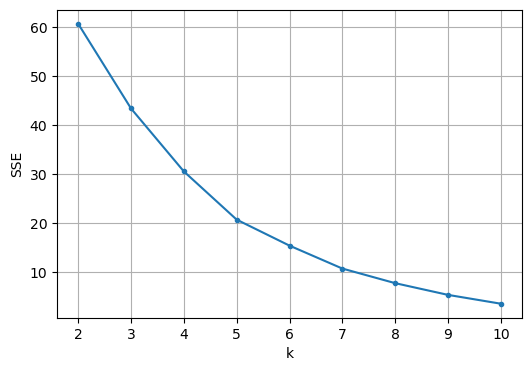

C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: User

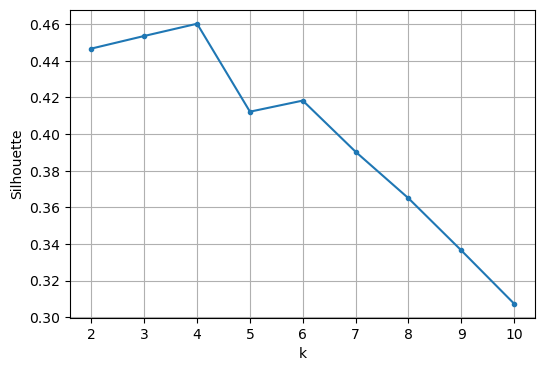

In [22]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, max_k + 1), sse_list, marker='.')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(range(2, max_k + 1))
plt.grid()
plt.show()

sse_list = list()
sil_list = list()
max_k = 10
D = squareform(pdist(X))
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(D, kmeans.labels_, metric='precomputed'))

plt.figure(figsize=(6,4))
plt.plot(range(2, max_k + 1), sil_list, marker='.')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.xticks(range(2, max_k + 1))
plt.grid()
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, n_init=100, max_iter=300, random_state=0)

In [45]:
kmeans.fit(X)

C:\Users\RConti\.conda\envs\env_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=100, random_state=0)

In [46]:
kmeans.inertia_ # SSE

7.510661382760164

In [47]:
kmeans.cluster_centers_

array([[-0.75134448, -0.8824109 ],
       [ 1.76011002,  1.32214078],
       [-0.03976282,  0.37901928]])

In [48]:
pivot_df2['kmeans_label'] = kmeans.labels_
C = scaler.inverse_transform(kmeans.cluster_centers_)
dfc = pd.DataFrame(data=C, columns=columns)
dfc

,produzione totale - quintali,superficie totale - ettari
0,2.037214e+08,5.279706e+06
1,1.519191e+09,2.341455e+07
2,5.764392e+08,1.565634e+07


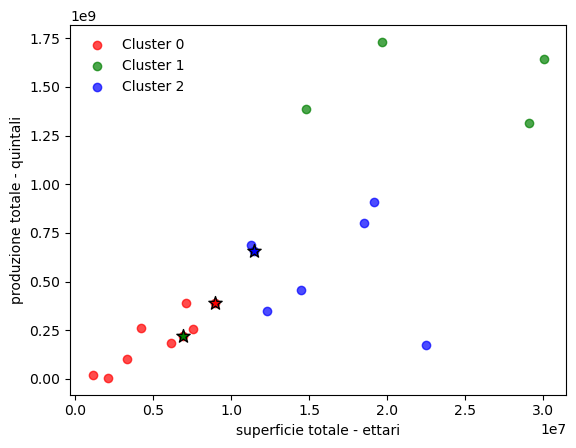

In [49]:
x = 'superficie totale - ettari'
y = 'produzione totale - quintali'
#colors = ['r', 'g', 'b', 'c', 'k', 'y']
colors = ['r', 'g', 'b']

for l in sorted(pivot_df2['kmeans_label'].unique()):
    plt.scatter(pivot_df2[pivot_df2['kmeans_label'] == l][x], pivot_df2[pivot_df2['kmeans_label'] == l][y], label='Cluster ' + str(l), alpha=0.7, c=colors[l])
    plt.scatter(pivot_df2.iloc[l][x], pivot_df2.iloc[l][y], marker='*', s=100, c=colors[l], edgecolors='k')

plt.legend(frameon=False)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

In [181]:
data_modificato = pd.read_excel("dataset_filtrato.xlsx")

In [182]:
data_modificato

,Territorio,produzione raccolta - quintali,produzione totale - migliaia di quintali,produzione totale - quintali,superficie in produzione - ettari,superficie totale - are,superficie totale - ettari,Regione geografica
0,Abruzzo,414622792,186761,3.903696e+08,6521026,223044,8980592,Sud
1,Calabria,726429994,187643,6.570584e+08,9367903,1235925,11480757,Sud
2,Campania,826069435,702706,6.867136e+08,8026616,19985098,11259000,Sud
3,Emilia-Romagna,2155951623,1773157,1.731299e+09,10335713,1954999,19695401,Centro
4,Friuli-Venezia Giulia,275349956,119788,2.629612e+08,1668191,87102,4247393,Nord
5,Lazio,586158036,647231,4.583848e+08,11213680,14125327,14452937,Centro
6,Liguria,23118492,16069,1.884871e+07,1030291,162960,1135318,Nord
7,Lombardia,1775429746,2599303,9.111309e+08,10789428,4171819,19138378,Nord
8,Marche,281907000,262791,2.566031e+08,3334537,68096,7583358,Centro
9,Molise,123510812,38716,1.033715e+08,1880408,25035,3352297,Sud


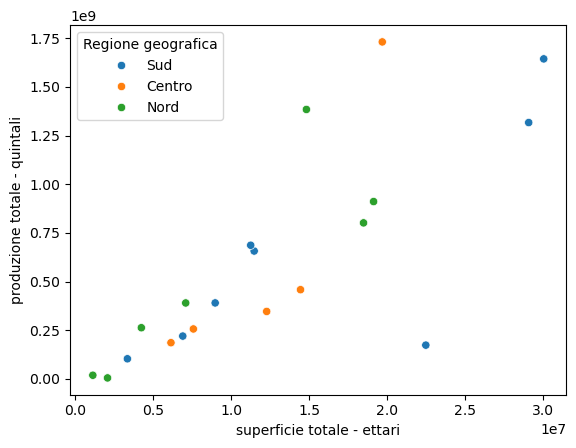

In [183]:
import seaborn as sns
x = 'superficie totale - ettari'
y = 'produzione totale - quintali'
sns.scatterplot(data_modificato, x = x, y = y, hue = 'Regione geografica')
plt.show()

In [187]:
alt.Chart(data_modificato).mark_circle(tooltip = True).encode(
    x='superficie totale - ettari:Q',
    y='produzione totale - quintali:Q',
    tooltip = 'Territorio:N',
    color = 'Regione geografica:N'
    #color=alt.Color(field='Value', type='quantitative',  bin=alt.BinParams(maxbins=5)),
    #size=alt.Size(field='Value', type='quantitative',  bin=alt.BinParams(maxbins=5))
).properties(width = 800).configure_circle(
    size=100)

alt.Chart(...)

In [108]:
fields = ['superficie totale - ettari', 'produzione totale - quintali']

alt.Chart(data_modificato).mark_point(opacity=0.6, tooltip=True).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Regione geografica:N'
).properties(
    width=300,
    height=200
).repeat(
    row=fields,
    column=fields
)

alt.RepeatChart(...)

In [16]:
apiCovid='https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'

In [17]:
df=pd.read_csv(apiCovid, parse_dates=['data'])
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31810,2024-04-17 17:00:00,ITA,19,Sicilia,38.115697,13.362357,59,3,62,854,...,NaN,1.0,NaN,NaN,543146.0,1291674.0,5501535.0,11467863.0,ITG,ITG1
31811,2024-04-17 17:00:00,ITA,9,Toscana,43.769231,11.255889,7,1,8,163,...,NaN,0.0,NaN,NaN,732399.0,921345.0,7149272.0,10204767.0,ITI,ITI1
31812,2024-04-17 17:00:00,ITA,10,Umbria,43.106758,12.388247,9,0,9,523,...,Si fa presente che dei 9 ricoveri non in T.I.:...,0.0,NaN,NaN,160684.0,298397.0,1764606.0,3411067.0,ITI,ITI2
31813,2024-04-17 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,3,...,NaN,0.0,NaN,NaN,16500.0,35973.0,146757.0,460697.0,ITC,ITC2


In [18]:
df_ridotto = df[['denominazione_regione', 'lat', 'long', 'codice_regione']].drop_duplicates()
df_ridotto.drop([2578], axis=0, inplace=True)
df_ridotto

,denominazione_regione,lat,long,codice_regione
0,Abruzzo,42.351222,13.398438,13
1,Basilicata,40.639471,15.805148,17
2,Calabria,38.905976,16.594402,18
3,Campania,40.839566,14.250850,15
4,Emilia-Romagna,44.494367,11.341721,8
5,Friuli Venezia Giulia,45.649435,13.768136,6
6,Lazio,41.892770,12.483667,12
7,Liguria,44.411493,8.932699,7
8,Lombardia,45.466794,9.190347,3
9,Marche,43.616760,13.518875,11


In [19]:
df_ridotto_2 = df_ridotto.rename(columns={'denominazione_regione': 'Territorio'}) 
df_ridotto_2

,Territorio,lat,long,codice_regione
0,Abruzzo,42.351222,13.398438,13
1,Basilicata,40.639471,15.805148,17
2,Calabria,38.905976,16.594402,18
3,Campania,40.839566,14.250850,15
4,Emilia-Romagna,44.494367,11.341721,8
5,Friuli Venezia Giulia,45.649435,13.768136,6
6,Lazio,41.892770,12.483667,12
7,Liguria,44.411493,8.932699,7
8,Lombardia,45.466794,9.190347,3
9,Marche,43.616760,13.518875,11


In [20]:
df_ridotto_3 = df_ridotto_2[df_ridotto_2['Territorio'] != 'P.A. Bolzano']
df_ridotto_3

,Territorio,lat,long,codice_regione
0,Abruzzo,42.351222,13.398438,13
1,Basilicata,40.639471,15.805148,17
2,Calabria,38.905976,16.594402,18
3,Campania,40.839566,14.250850,15
4,Emilia-Romagna,44.494367,11.341721,8
5,Friuli Venezia Giulia,45.649435,13.768136,6
6,Lazio,41.892770,12.483667,12
7,Liguria,44.411493,8.932699,7
8,Lombardia,45.466794,9.190347,3
9,Marche,43.616760,13.518875,11


In [21]:
pivot_df2

,Territorio,produzione totale - quintali,superficie totale - ettari
0,Abruzzo,21294481,479361
1,Basilicata,10778330,390349
2,Bolzano / Bozen,10718866,236017
3,Calabria,28187403,514831
4,Campania,33277492,531152
5,Emilia-Romagna,83797351,1016423
6,Friuli-Venezia Giulia,14944240,244656
7,Lazio,25741948,754409
8,Liguria,800662,58861
9,Lombardia,42470582,1063490


In [36]:
df_ridotto_2['Territorio'] = df_ridotto_2['Territorio'].replace(['Friuli Venezia Giulia', 'P.A. Trento', "Valle d'Aosta", "P.A. Bolzano"],['Friuli-Venezia Giulia', 'Trentino Alto Adige / Südtirol', "Valle d'Aosta / Vallée d'Aoste", "Bolzano / Bozen"])

In [38]:
df_final = df_ridotto_2.merge(pivot_df2, how='inner', on='Territorio')
df_final

,Territorio,lat,long,codice_regione,produzione totale - quintali,superficie totale - ettari
0,Abruzzo,42.351222,13.398438,13,21294481,479361
1,Basilicata,40.639471,15.805148,17,10778330,390349
2,Calabria,38.905976,16.594402,18,28187403,514831
3,Campania,40.839566,14.250850,15,33277492,531152
4,Emilia-Romagna,44.494367,11.341721,8,83797351,1016423
5,Friuli-Venezia Giulia,45.649435,13.768136,6,14944240,244656
6,Lazio,41.892770,12.483667,12,25741948,754409
7,Liguria,44.411493,8.932699,7,800662,58861
8,Lombardia,45.466794,9.190347,3,42470582,1063490
9,Marche,43.616760,13.518875,11,11756185,384981


In [39]:
import altair as alt

urlGeo='https://raw.githubusercontent.com/openpolis/geojson-italy/master/topojson/limits_IT_all.topo.json'
italyGeoRegions=alt.topo_feature(urlGeo,'regions')

italyBaseMap=alt.Chart(italyGeoRegions).mark_geoshape(
    fill='lightgray', stroke='white', strokeWidth=1
)

italyBaseMap

alt.Chart(...)

In [40]:
bubbles=alt.Chart(df_final).mark_circle().encode(
        latitude='lat:Q',
        longitude='long:Q',
        tooltip='Territorio:N',
        size='superficie totale - ettari:Q' # come fare i pallini più grandi (hint: cerco range nella documentazione)

    )

(italyBaseMap + bubbles).properties(width=600,height=600)

alt.LayerChart(...)

In [41]:
bubbles=alt.Chart(df_final).mark_circle().encode(
        latitude='lat:Q',
        longitude='long:Q',
        tooltip='Territorio:N',
        size='produzione totale - quintali:Q' # come fare i pallini più grandi (hint: cerco range nella documentazione)

    )

(italyBaseMap + bubbles).properties(width=600,height=600)

alt.LayerChart(...)

In [42]:
p = alt.Chart(italyGeoRegions).mark_geoshape(
    stroke='#fff', strokeWidth=0.25
).transform_lookup(
    lookup='properties.reg_istat_code_num', from_=alt.LookupData(data=df_final, key='codice_regione', fields=['Territorio', 'produzione totale - quintali'])
).encode(
    color= alt.Color('produzione totale - quintali:Q', scale=alt.Scale(scheme='oranges', type='quantize')),
    tooltip= [
              alt.Tooltip('produzione totale - quintali:Q'),
              alt.Tooltip('Territorio:N')
              #alt.Tooltip('data:N')
    ]
).project(
    type='mercator'
).properties(
    width=400,
    height=400
).configure_view(
    stroke=None
)

s = alt.Chart(italyGeoRegions).mark_geoshape(
    stroke='#fff', strokeWidth=0.25
).transform_lookup(
    lookup='properties.reg_istat_code_num', from_=alt.LookupData(data=df_final, key='codice_regione', fields=['Territorio', 'superficie totale - ettari'])
).encode(
    color= alt.Color('superficie totale - ettari:Q', scale=alt.Scale(scheme='oranges', type='quantize')),
    tooltip= [
              alt.Tooltip('superficie totale - ettari:Q'),
              alt.Tooltip('Territorio:N')
              #alt.Tooltip('data:N')
    ]
).project(
    type='mercator'
).properties(
    width=400,
    height=400
).configure_view(
    stroke=None
)

In [43]:
p

alt.Chart(...)

In [44]:
s

alt.Chart(...)

In [5]:
# Selezione del territorio di interesse
#territorio = 'Italia'

# Selezione degli attributi che si vogliono osservare
attributo_1 = 'superficie totale - ettari'
attributo_2 = 'produzione totale - quintali'
#attributo_1 = 'produzione totale - quintali'
#attributo_2 = 'produzione raccolta - quintali'
#attributo_1 = 'superficie totale - ettari'
#attributo_2 = 'superficie in produzione - ettari'

data_filtered2 = data_filtered
column_of_interest = ['Tipo dato', 'Tipo di coltivazione', 'TIME', 'Value', 'Territorio']
data_filtered3 = data_filtered2[column_of_interest]

# Calcolo valore totale per Tipo dato e TIME
summarized_df = data_filtered3.groupby(['Tipo dato', 'TIME', 'Territorio'])['Value'].sum().reset_index()

# Rimozione anno 2024 perchè mancano dei dati
summarized_df = summarized_df[summarized_df['TIME'] != 2024]

# Selezione primo attributo
attributo_1_df = summarized_df[summarized_df['Tipo dato'] == attributo_1]

attributo_1_df

,Tipo dato,TIME,Territorio,Value
11121,superficie totale - ettari,2006,Abruzzo,439404.0
11122,superficie totale - ettari,2006,Agrigento,171705.0
11123,superficie totale - ettari,2006,Alessandria,144204.0
11124,superficie totale - ettari,2006,Ancona,98531.0
11125,superficie totale - ettari,2006,Arezzo,69815.0
...,...,...,...,...
13479,superficie totale - ettari,2023,Vercelli,35590.0
13480,superficie totale - ettari,2023,Verona,224567.0
13481,superficie totale - ettari,2023,Vibo Valentia,79981.0
13482,superficie totale - ettari,2023,Vicenza,107982.0


In [10]:
import altair as alt

# Dropdown options (list of Territories)
dropdown_options = sorted(attributo_1_df['Territorio'].unique().tolist())

# Dropdown selection
dropdown = alt.binding_select(options=dropdown_options)
#selection = alt.selection_point(fields=['Territorio'], bind=dropdown, name='Select', init={'Territorio': 'Italia'})
selection = alt.selection_point(fields=['Territorio'], bind=dropdown, name='Select', value=dropdown_options[0])

# Scatter plot based on selection
scatter_plot = alt.Chart(attributo_1_df).transform_filter(
    selection  # Apply selection filter to the data
).mark_circle().encode(
    y='Value:Q',
    x='TIME:N',
    size=alt.Size(field='Value', type='quantitative', bin=alt.BinParams(maxbins=5)),
    color=alt.Color('Value:Q', scale=alt.Scale(scheme='blues')),
    tooltip=['TIME', 'Value']
).add_params(
    selection
).properties(
    width=600,
    height=400,
    title='superficie totale - ettari'
)

# Display the scatter plot
scatter_plot

alt.Chart(...)

In [11]:
Territorio = 'Italia'
attributo_1 = 'superficie totale - ettari'
data_filtered4 = data_filtered3[data_filtered3['Tipo dato'] == attributo_1]
data_filtered5 = data_filtered4[data_filtered4['Territorio'] == Territorio]
data_filtered5

,Tipo dato,Tipo di coltivazione,TIME,Value,Territorio
2736,superficie totale - ettari,sedano in piena aria,2006,3829.0,Italia
2737,superficie totale - ettari,sedano in piena aria,2007,3850.0,Italia
2738,superficie totale - ettari,sedano in piena aria,2008,3958.0,Italia
2739,superficie totale - ettari,sedano in piena aria,2009,3552.0,Italia
2740,superficie totale - ettari,sedano in piena aria,2010,3221.0,Italia
...,...,...,...,...,...
652472,superficie totale - ettari,altre coltivazioni di radici diverse dalla pat...,2023,71.0,Italia
652503,superficie totale - ettari,altre piante tessili,2021,16.0,Italia
652504,superficie totale - ettari,altre piante tessili,2022,14.0,Italia
652505,superficie totale - ettari,altre piante tessili,2023,22.0,Italia


In [12]:
summarized_df = data_filtered5.groupby(['Tipo di coltivazione'])['Value'].sum().reset_index()
summarized_df
#len(data_filtered5['Tipo di coltivazione'].unique())

,Tipo di coltivazione,Value
0,pomodoro da trasformazione in piena aria,1453896.0
1,aglio,13584.0
2,aglio e scalogno in piena aria,44292.0
3,agrumi,140869.0
4,albicocca,340014.0
...,...,...
174,uva spina,142.0
175,uve per altri vini (escluso dop e igp),649907.0
176,uve per vini dop,1386707.0
177,uve per vini igp,700372.0


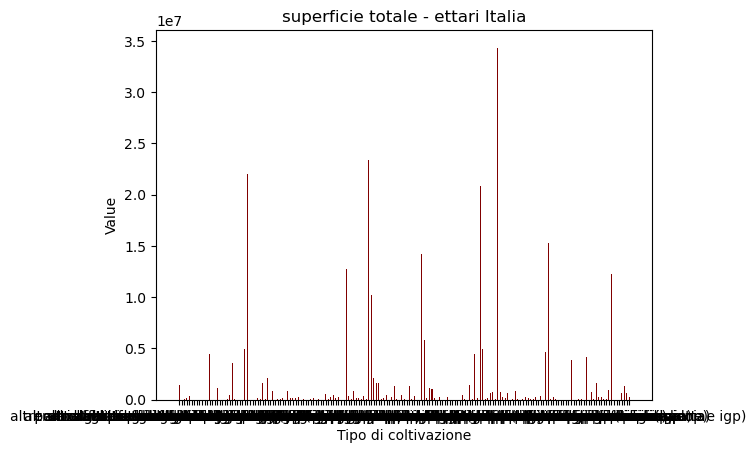

In [19]:
plt.bar(summarized_df['Tipo di coltivazione'], summarized_df['Value'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tipo di coltivazione")
plt.ylabel("Value")
plt.title(attributo_1 + ' ' + Territorio)
plt.show()

In [23]:
alt.Chart(summarized_df).mark_arc().encode(
    theta = 'Value',
    color = 'Tipo di coltivazione',
    tooltip=['Tipo di coltivazione', 'Value']
)

alt.Chart(...)

In [28]:
data_filtered6 = data_filtered5[data_filtered5['TIME'] == 2019]
alt.Chart(data_filtered6).mark_arc().encode(
    theta = 'Value',
    color = 'Tipo di coltivazione',
    tooltip=['Tipo di coltivazione', 'Value']
)

alt.Chart(...)

In [55]:
data_filtered6 = data_filtered5[data_filtered5['TIME'] == 2012]
alt.Chart(data_filtered6).mark_arc().encode(
    theta = 'Value',
    color = 'Tipo di coltivazione',
    tooltip=['Tipo di coltivazione', 'Value']
)

alt.Chart(...)

In [13]:
data_filtered6 = data_filtered5[data_filtered5['TIME'] == 2012]
total = data_filtered6['Value'].sum()  # Calculate the total of column 'A'
data_filtered6['Percentage'] = (data_filtered6['Value'] / total) * 100
data_filtered6['Percentage'] = data_filtered6['Percentage'].round(2)
df_sorted = data_filtered6.sort_values(by = 'Percentage', ascending=False)
df_sorted

C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\2423690331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered6['Percentage'] = (data_filtered6['Value'] / total) * 100
C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\2423690331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered6['Percentage'] = data_filtered6['Percentage'].round(2)


,Tipo dato,Tipo di coltivazione,TIME,Value,Territorio,Percentage
272689,superficie totale - ettari,frumento duro,2012,1260143.0,Italia,11.38
236718,superficie totale - ettari,olive da tavola e da olio,2012,1125382.0,Italia,10.17
171075,superficie totale - ettari,altri pascoli,2012,1074201.0,Italia,9.70
409111,superficie totale - ettari,mais,2012,978543.0,Italia,8.84
129726,superficie totale - ettari,prati permanenti,2012,719385.0,Italia,6.50
...,...,...,...,...,...,...
444238,superficie totale - ettari,ribes rosso,2012,72.0,Italia,0.00
166236,superficie totale - ettari,ravizzone,2012,269.0,Italia,0.00
432130,superficie totale - ettari,cedro,2012,45.0,Italia,0.00
180583,superficie totale - ettari,altre bacche,2012,399.0,Italia,0.00


In [14]:
df_sorted_filtered = df_sorted[df_sorted['Percentage'] > 1.00]
df_sorted_filtered

,Tipo dato,Tipo di coltivazione,TIME,Value,Territorio,Percentage
272689,superficie totale - ettari,frumento duro,2012,1260143.0,Italia,11.38
236718,superficie totale - ettari,olive da tavola e da olio,2012,1125382.0,Italia,10.17
171075,superficie totale - ettari,altri pascoli,2012,1074201.0,Italia,9.70
409111,superficie totale - ettari,mais,2012,978543.0,Italia,8.84
129726,superficie totale - ettari,prati permanenti,2012,719385.0,Italia,6.50
197482,superficie totale - ettari,uva da vino,2012,696512.0,Italia,6.29
202505,superficie totale - ettari,pascoli poveri,2012,667615.0,Italia,6.03
131126,superficie totale - ettari,erba medica,2012,601821.0,Italia,5.44
72373,superficie totale - ettari,frumento tenero,2012,593494.0,Italia,5.36
129462,superficie totale - ettari,mais ceroso,2012,296314.0,Italia,2.68


In [15]:
dodici = alt.Chart(df_sorted_filtered).mark_bar(color = 'blue').encode(
    x = 'Tipo di coltivazione',
    y = alt.Y('Percentage', scale=alt.Scale(domain=(0, 12))),
    tooltip=['Tipo di coltivazione', 'Percentage']
)

In [16]:
data_filtered6 = data_filtered5[data_filtered5['TIME'] == 2019]
total = data_filtered6['Value'].sum()
data_filtered6['Percentage'] = (data_filtered6['Value'] / total) * 100
data_filtered6['Percentage'] = data_filtered6['Percentage'].round(2)
df_sorted = data_filtered6.sort_values(by = 'Percentage', ascending=False)
df_sorted_filtered = df_sorted[df_sorted['Percentage'] > 1.00]
diciannove = alt.Chart(df_sorted_filtered).mark_bar(color = 'blue').encode(
    x = 'Tipo di coltivazione',
    y = alt.Y('Percentage', scale=alt.Scale(domain=(0, 15))),
    tooltip=['Tipo di coltivazione', 'Percentage']
).properties(
    title = '2019'
)

data_filtered6 = data_filtered5[data_filtered5['TIME'] == 2020]
total = data_filtered6['Value'].sum()
data_filtered6['Percentage'] = (data_filtered6['Value'] / total) * 100
data_filtered6['Percentage'] = data_filtered6['Percentage'].round(2)
df_sorted = data_filtered6.sort_values(by = 'Percentage', ascending=False)
df_sorted_filtered = df_sorted[df_sorted['Percentage'] > 1.00]
venti = alt.Chart(df_sorted_filtered).mark_bar(color = 'orange').encode(
    x = 'Tipo di coltivazione',
    y = alt.Y('Percentage', scale=alt.Scale(domain=(0, 15))),
    tooltip=['Tipo di coltivazione', 'Percentage']
).properties(
    title = '2020'
)

C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\925971820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered6['Percentage'] = (data_filtered6['Value'] / total) * 100
C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\925971820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered6['Percentage'] = data_filtered6['Percentage'].round(2)
C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\925971820.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [17]:
# Combine the charts into a single row layout
combined_chart = diciannove | venti

# Display the combined chart
combined_chart

alt.HConcatChart(...)

In [29]:
total_by_year = data_filtered5.groupby('TIME')['Value'].transform('sum')
data_filtered5['Percentage'] = (data_filtered5['Value'] / total_by_year) * 100
data_filtered5['Percentage'] = data_filtered5['Percentage'].round(2)
df_sorted = data_filtered5.sort_values(by = 'Percentage', ascending=False)
df_sorted_filtered = df_sorted[df_sorted['Percentage'] > 1.00]
df_sorted_filtered = df_sorted_filtered[df_sorted_filtered['TIME'] != 2024]
df_sorted_filtered

C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\4172709312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered5['Percentage'] = (data_filtered5['Value'] / total_by_year) * 100
C:\Users\RConti\AppData\Local\Temp\ipykernel_17704\4172709312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered5['Percentage'] = data_filtered5['Percentage'].round(2)


,Tipo dato,Tipo di coltivazione,TIME,Value,Territorio,Percentage
202503,superficie totale - ettari,pascoli poveri,2010,2366887.0,Italia,17.14
202500,superficie totale - ettari,pascoli poveri,2007,2370841.0,Italia,16.92
202504,superficie totale - ettari,pascoli poveri,2011,2265729.0,Italia,16.77
202499,superficie totale - ettari,pascoli poveri,2006,2293659.0,Italia,16.64
202502,superficie totale - ettari,pascoli poveri,2009,2224521.0,Italia,16.54
...,...,...,...,...,...,...
387061,superficie totale - ettari,girasole,2006,144566.0,Italia,1.05
343309,superficie totale - ettari,altri erbai monofiti,2006,139923.0,Italia,1.02
637446,superficie totale - ettari,uve per vini igp,2021,169255.0,Italia,1.01
343314,superficie totale - ettari,altri erbai monofiti,2011,136178.0,Italia,1.01


In [36]:
# Dropdown options (list of TIME)
dropdown_options = sorted(df_sorted_filtered['TIME'].unique().tolist())

# Dropdown selection
dropdown = alt.binding_select(options=dropdown_options)
#selection = alt.selection_point(fields=['Territorio'], bind=dropdown, name='Select', init={'Territorio': 'Italia'})
selection = alt.selection_point(fields=['TIME'], bind=dropdown, name='Select', value=dropdown_options[0])

# First plot based on selection
primo_plot = alt.Chart(df_sorted_filtered).transform_filter(
    selection  # Apply selection filter to the data
).mark_bar(color = 'blue').encode(
    x = 'Tipo di coltivazione',
    y = alt.Y('Percentage', scale=alt.Scale(domain=(0, df_sorted_filtered['Percentage'].max()+1))),
    tooltip=['Tipo di coltivazione', 'Percentage']
).properties(
    width=400,
    height=300,
    title = 'superficie totale - ettari'
).add_params(
    selection
)

In [37]:
primo_plot

alt.Chart(...)

In [43]:
import pandas as pd
import altair as alt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import HBox, VBox, Layout

# Sample DataFrame with longer category names
df = df_sorted_filtered

# Dropdown options (list of TIME)
dropdown_options = sorted(df['TIME'].unique().tolist())

# Function to update chart1 based on selected category
def update_chart1(TIME1):
    filtered_df = df[df['TIME'] == TIME1]
    chart = alt.Chart(filtered_df).mark_bar(color = 'blue').encode(
        x = 'Tipo di coltivazione',
        y = alt.Y('Percentage', scale=alt.Scale(domain=(0, df_sorted_filtered['Percentage'].max()+1))),
        tooltip=['Tipo di coltivazione', 'Percentage'],
        
    ).properties(
        width=400,
        height=300,
        title = 'superficie totale - ettari'
     )
    display(chart)

# Function to update chart2 based on selected year
def update_chart2(TIME2):
    filtered_df = df[df['TIME'] == TIME2]
    chart = alt.Chart(filtered_df).mark_bar(color = 'orange').encode(
        x = 'Tipo di coltivazione',
        y = alt.Y('Percentage', scale=alt.Scale(domain=(0, df_sorted_filtered['Percentage'].max()+1))),
        tooltip=['Tipo di coltivazione', 'Percentage']
    ).properties(
        width=400,
        height=300,
        title = 'superficie totale - ettari'
     )
    display(chart)

dropdown_category = widgets.Dropdown(
    options=dropdown_options,
    value=dropdown_options[0],  # Set initial value
    description='Select Year:',
    style={'description_width': 'initial'}  # Set description width to full
)

# Dropdown widget for selecting year
dropdown_year = widgets.Dropdown(
    options=dropdown_options,
    value=dropdown_options[1],  # Set initial value
    description='Select Year:',
    style={'description_width': 'initial'}  # Set description width to full
)

# Initial display of charts and dropdowns side by side
output1 = widgets.Output()
output2 = widgets.Output()

with output1:
    display(VBox([dropdown_category]))
    update_chart1(dropdown_category.value)

with output2:
    display(VBox([dropdown_year]))
    update_chart2(dropdown_year.value)

# Arrange the outputs (charts) horizontally using HBox layout
display(HBox([output1, output2]))

# Set up event handlers for dropdowns
def on_category_change(change):
    with output1:
        clear_output(wait=True)
        display(VBox([dropdown_category]))
        update_chart1(change.new)

def on_year_change(change):
    with output2:
        clear_output(wait=True)
        display(VBox([dropdown_year]))
        update_chart2(change.new)

dropdown_category.observe(on_category_change, names='value')
dropdown_year.observe(on_year_change, names='value')